# Phase 4 Code Challenge Review



## Overview

- Principal Component Analysis
- Clustering
- Time Series
- Natural Language Processing

In [1]:
# Basic Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Principal Component Analysis

![pca gif saved from learnco](images/pca.gif)

## PCA Concepts

### 1: What does PCA do? 

Specifically, describe what the first principal component represents in relation to the original data.

#### Answer: 

- PCA takes the features of the data and uses linear algebra to convert them into unified components. The first principal component represents the largest amount of the variance in the original data out of the principal components. 


### 2: What are some reasons to use PCA?

#### Answer: 

- PCA can reduce the dimensionality of a large dataset, which helps with decreasing model complexity and multicolinearity.
- PCa can reduce computing time.


### 3: Why is scaling important for PCA?

#### Answer: 

- If PCA is trying to use the captured variance to create principal components, it helps for the different features to be on the same scale.


### 4: How can one determine how many principle components to use in a model?

#### Answer: 

- Sklearn can use the n_components parameter 0 < n < 1 to create a number of principal components that explains that proportion of the variance.
- Additionally, you can look at the amount of variance explained by each principal component and only use the best ones.


## PCA in Code

### Set Up

In [2]:
from sklearn.datasets import  load_breast_cancer

data = load_breast_cancer()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 5: Prepare our Data for PCA

What steps do we need to take to preprocess our data effectively?

- Scale the data


In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

### 6: Import PCA, Then Instantiate and Fit a PCA Object

In [4]:
# Code to import, instantiate and fit a PCA object
from sklearn.decomposition import PCA

pca = PCA(n_components=0.8)

pca.fit(X_scaled)

PCA(n_components=0.8)

### 7: How Much Variance is Explained by the First 2 Components?

In [6]:
# Code here to answer the question
sum(pca.explained_variance_ratio_[0:2])

0.7038117901347674

#### Answer:

- 70.4%


# 2) Clustering

## Clustering Concepts

### 8: Describe how the K-Means algorithm updates its cluster centers after initialization.

#### Answer:

- K-means will randomply place however many centers you specify, then calculate the distances between themselves and the observations to create clusters. It then optimizes by continuing to move around while optimizing for highest distance from other clusters and lowest distance within their own cluster.


### 9: What is inertia, and how does K-Means use inertia to determine the best estimator?

Please also describe the method you can use to evaluate clustering using inertia.

Documentation, for reference: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

#### Answer:

- Inertia is essentially the distance of the points in a cluster from their cluster center, and k-means seeks to minimize the amount of intertia. The elbow method is one way to evaluate the clustering inertia.


### 10: What other metric do we have to score the clusters which are formed?

Describe the difference between it and inertia.

#### Answer:

- The silhouette score is another metric to score the clusters. The inertia only calculates the distances within each cluster, whereas the silhouette score also measures the distance from other clusters.


## Clustering in Code with Heirarchical Agglomerative Clustering

After the above conceptual review of KMeans, let's practice coding with agglomerative clustering.


### Set Up

In [7]:
# New dataset for this section!
from sklearn.datasets import load_iris

data = load_iris()
X = pd.DataFrame(data['data'])

### 11: Prepare our Data for Clustering

What steps do we need to take to preprocess our data effectively?

- Scale the data


In [9]:
# Code to preprocess the data
# Name the processed data X_processed
scaler = MinMaxScaler()
X_processed = scaler.fit_transform=(X)

### 12: Import the Relevant Class, Then Instantiate and Fit a Hierarchical Agglomerative Clustering Object

Let's use `n_clusters = 2` to start (default)

In [10]:
# Import the relevent clustering algorithm
from sklearn.cluster import AgglomerativeClustering

In [11]:
# Fit the object
cluster = AgglomerativeClustering(n_clusters = 2)
cluster.fit(X_processed)

AgglomerativeClustering()

In [13]:
# Calculate a silhouette score
from sklearn.metrics import silhouette_score
silhouette_score(X_processed, cluster.labels_)

0.6867350732769776

### 13: Write a Function to Test Different Options for `n_clusters`

The function should take in the number for `n_clusters` and the data to cluster, fit a new clustering model using that parameter to the data, print the silhouette score, then return the labels attribute from the fit clustering model.

In [16]:
def test_n_for_clustering(n, data):
    """ 
    Tests different numbers for the hyperparameter n_clusters
    Prints the silhouette score for that clustering model
    Returns the labels that are output from the clustering model

    Parameters: 
    -----------
    n: float object
        number of clusters to use in the agglomerative clustering model
    data: Pandas DataFrame or array-like object
        Data to cluster

    Returns: 
    --------
    labels: array-like object
        Labels attribute from the clustering model
    """
    # Fit the new clustering model
    cluster = AgglomerativeClustering(n_clusters = n)
    cluster.fit(data)
    
    # Print the silhouette score
    print(silhouette_score(data, cluster.labels_))
    
    # Return the labels attribute from the fit clustering model
    return cluster.labels_

In [17]:
# Testing your function

for n in range(2, 9):
    test_n_for_clustering(n, X_processed)

0.6867350732769776
0.5543236611296415
0.4889670857554686
0.48438258927905886
0.3592376192603073
0.3422071936620491
0.3435906599119526


# 3) Time Series

In [38]:
# New dataset for this section!
ap = pd.read_csv('data/AirPassengers.csv')
ap.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


### 14: Prepare our Data for Time Series Analysis

What steps do we need to take to preprocess our data effectively?

- Convert to datetime object
- Set as index


In [39]:
# Code here 
ap['Month'] = pd.to_datetime(ap['Month'])
ap = ap.set_index(ap['Month'])
ap = ap.drop(columns='Month')
ap.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### 15: Explore Patterns in the Data

First: what kinds of patterns can one find in time series data?

- seasonality
- irregular cycles
- changes in variance
- upward or downward trend


Second, plot this time series data. What kinds of patterns do you see in this dataset?

<AxesSubplot:xlabel='Month'>

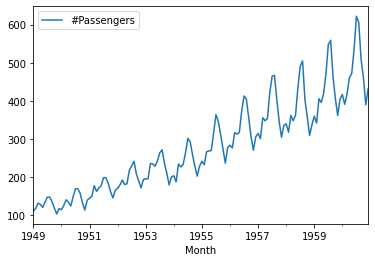

In [40]:
# Code to plot the time series
ap.plot()

### 16: Explore the Moving Average

What window would make sense to use for this data?

- 12


In [41]:
# Code to create the moving average
rolling_avg = ap.rolling(window=12).mean()

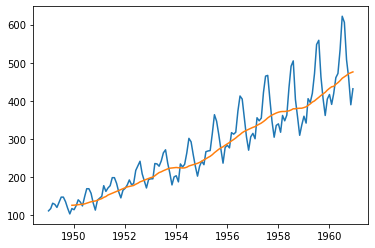

In [42]:
# Add to the moving average to the above plot
plt.plot(ap)
plt.plot(rolling_avg)

### 17: Explore Stationarity


Why do we try to make our data stationary?

- Model cannot predict well if the data isn't stationary because it is taking in extraneous factors.


What can we do to make our data stationary?

- Difference the data
- Transformations
- Subtract rolling mean


### 18: Check Stationarity

In [43]:
# Code here to check if the data is stationary
from statsmodels.tsa.stattools import adfuller
adfuller(ap)

(0.8153688792060433,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

### 19: Try to Make the Data Stationarity

Implement one strategy to try to make the data more stationary, then check if it worked.

<AxesSubplot:xlabel='Month'>

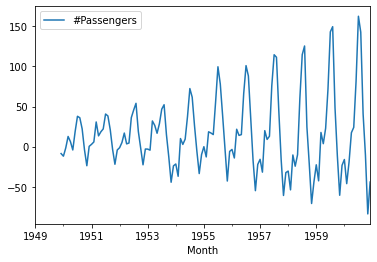

In [44]:
# Code here to try to make the data stationary
stationary_ap = ap - rolling_avg
stationary_ap.plot()

In [47]:
# Code here to check if the data is stationary
stationary_ap = stationary_ap.dropna()
adfuller(stationary_ap)

(-3.1649681299551444,
 0.022104139473878875,
 13,
 119,
 {'1%': -3.4865346059036564,
  '5%': -2.8861509858476264,
  '10%': -2.579896092790057},
 906.2878851500943)

<a id='clust'></a>

# 4) Natural Language Processing

## NLP Concepts

### Some Example Text

In [48]:
# Each sentence is a document
sentence_one = "Harry Potter is the best young adult book about wizards"
sentence_two = "Um, EXCUSE ME! Ever heard of Earth Sea?"
sentence_three = "I only like to read non-fiction.  It makes me a better person."

# The corpus is composed of all of the documents
corpus = [sentence_one, sentence_two, sentence_three]

### 20: NLP Pre-processing

List at least three steps you can take to turn raw text like this into something that would be semantically valuable (aka ready to turn into numbers):

#### Answer:

1. stem or lemmatize
2. remove punctuation
3. remove stopwords

### 21: Describe what vectorized text would look like as a dataframe.

If you vectorize the above corpus, what would the rows and columns be in the resulting dataframe (aka document term matrix)

#### Answer:

- Each row is a document, and each column would be a word or token


### 22: What does TF-IDF do?

Also, what does TF-IDF stand for?

#### Answer:

- TF-IDF stands for Term Frequency Inverse Document Frequency. TF-IDF is a vectorizer that can consider how many times the words appear in all the documents, to provide more magnitude to unique words and less to common words.


## NLP in Code

### Set Up

In [49]:
# New section, new data
policies = pd.read_csv('data/2020_policies_feb_24.csv')

def warren_not_warren(label):
    
    '''Make label a binary between Elizabeth Warren
    speeches and speeches from all other candidates'''
    
    if label =='warren':
        return 1
    else:
        return 0
    
policies['candidate'] = policies['candidate'].apply(warren_not_warren)

The dataframe loaded above consists of policies of 2020 Democratic presidential hopefuls. The `policy` column holds text describing the policies themselves.  The `candidate` column indicates whether it was or was not an Elizabeth Warren policy.

In [50]:
policies.head()

,Unnamed: 0,name,policy,candidate
0,0,100% Clean Energy for America,"As published on Medium on September 3rd, 2019:...",1
1,1,A Comprehensive Agenda to Boost America’s Smal...,Small businesses are the heart of our economy....,1
2,2,A Fair and Welcoming Immigration System,"As published on Medium on July 11th, 2019:\r\n...",1
3,3,A Fair Workweek for America’s Part-Time Workers,Working families all across the country are ge...,1
4,4,A Great Public School Education for Every Student,I attended public school growing up in Oklahom...,1


The documents for activity are in the `policy` column, and the target is candidate. 

### 23: Import the Relevant Class, Then Instantiate and Fit a Count Vectorizer Object

In [51]:
# First! Train-test split the dataset
from sklearn.model_selection import train_test_split

# Code here to train test split
X_train, X_test, y_train, y_test = train_test_split(policies['policy'], policies['candidate'])

In [52]:
# Import the relevant vectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [54]:
# Instantiate it
vectorizer = CountVectorizer()

In [55]:
# Fit it
vectorizer.fit(X_train)

CountVectorizer()

### 24: Vectorize Your Text, Then Model

In [56]:
# Code here to transform train and test sets with the vectorizer
vec_X_train = vectorizer.transform(X_train)
vec_X_test = vectorizer.transform(X_test)

In [57]:
# Importing the classifier...
from sklearn.ensemble import RandomForestClassifier

# Code here to instantiate and fit a Random Forest model
forest = RandomForestClassifier()
forest.fit(vec_X_train, y_train)

RandomForestClassifier()

In [58]:
# Code here to evaluate your model on the test set
forest.score(vec_X_test, y_test)

0.9375